In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD
# Plot
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

import os

path = '/content/drive/My Drive/Orange4Home/sensor_data_processed_normalizing_the_label_with_hot_encoding_timestamps_normalizing.csv'

data = pd.read_csv(path, index_col='Time',parse_dates=True)

training_labels = ['Timestamps','bedroom_switch_middle_left',
 'entrance_heater_effective_setpoint',
 'bedroom_switch_middle_right',
 'kitchen_noise',
 'livingroom_couch_plug_consumption',
 'global_snow_ext',
 'bedroom_heater1_effective_setpoint',
 'global_lighting_power',
 'livingroom_heater2_base_setpoint',
 'kitchen_dishwasher_current',
 'toilet_coldwater_total',
 'kitchen_hood_voltage',
 'kitchen_washingmachine_partial_energy',
 'walkway_switch2_bottom_left',
 'livingroom_shutter5',
 'kitchen_hood_total_energy',
 'bathroom_heater_command',
 'walkway_noise',
 'entrance_noise',
 'livingroom_shutter4',
 'livingroom_switch2_top_left',
 'global_rain_ext',
 'global_wind_speed_ext',
 'global_waterheater_total_energy',
 'global_lighting_current',
 'livingroom_heater2_temperature',
 'livingroom_tv_status',
 'office_tv_plug_consumption',
 'kitchen_fridge_power',
 'bedroom_closet_door',
 'bathroom_luminosity',
 'livingroom_tv_plug_consumption',
 'office_AC_setpoint',
 'bathroom_switch_bottom_right',
 'bedroom_light4',
 'office_heater_effective_mode',
 'global_lighting_total_energy',
 'kitchen_cupboard3',
 'toilet_switch_left',
 'entrance_heater_base_setpoint',
 'office_heater_command',
 'bedroom_light2',
 'livingroom_table_luminosity',
 'global_voltage',
 'bedroom_temperature',
 'kitchen_fridge_door',
 'bathroom_sink_coldwater_total',
 'global_lighting_partial_energy',
 'livingroom_couch_noise',
 'global_temperature_feel_ext',
 'livingroom_humidity',
 'kitchen_oven_current',
 'livingroom_presence_table',
 'bathroom_switch_bottom_left',
 'livingroom_heater1_command',
 'staircase_light',
 'office_noise',
 'kitchen_sink_hotwater_total',
 'bathroom_switch_top_right',
 'bedroom_switch_bottom_left',
 'livingroom_presence_couch',
 'livingroom_heater2_effective_setpoint',
 'bedroom_presence',
 'toilet_switch_right',
 'bedroom_humidity',
 'livingroom_heater1_effective_mode',
 'bedroom_heater2_effective_setpoint',
 'livingroom_heater2_command',
 'bedroom_shutter1',
 'global_active_power',
 'walkway_switch1_bottom_left',
 'kitchen_hood_current',
 'entrance_heater_temperature',
 'bedroom_CO2',
 'livingroom_table_plug_consumption',
 'bathroom_CO2',
 'bathroom_temperature',
 'bedroom_drawer1',
 'office_switch_right',
 'global_heaters_temperature',
 'global_waterheater_current',
 'kitchen_dishwasher_voltage',
 'global_shutters_voltage',
 'walkway_switch1_bottom_right',
 'livingroom_heater1_effective_setpoint',
 'livingroom_light1',
 'bathroom_heater_temperature',
 'kitchen_cooktop_current',
 'entrance_switch_left',
 'toilet_coldwater_instantaneous',
 'kitchen_oven_voltage',
 'bathroom_sink_hotwater_instantaneous',
 'staircase_switch_right',
 'kitchen_sink_coldwater_instantaneous',
 'livingroom_heater2_effective_mode',
 'office_tv_status',
 'global_shutters_current',
 'kitchen_fridge_current',
 'kitchen_washingmachine_total_energy',
 'bedroom_shutter2',
 'bathroom_light2',
 'global_waterheater_partial_energy',
 'global_frequency',
 'kitchen_switch_bottom_right',
 'bedroom_door',
 'kitchen_luminosity',
 'bedroom_heater2_command',
 'entrance_heater_command',
 'global_pressure_ext',
 'kitchen_oven_partial_energy',
 'global_shutters_power',
 'office_luminosity',
 'kitchen_cooktop_total_energy',
 'kitchen_washingmachine_voltage',
 'bathroom_light1',
 'bedroom_luminosity',
 'office_presence',
 'bathroom_heater_effective_setpoint',
 'bathroom_shower_hotwater_instantaneous',
 'livingroom_switch1_top_left',
 'bathroom_humidity',
 'kitchen_cupboard5',
 'bathroom_shower_coldwater_total',
 'bathroom_shower_coldwater_instantaneous',
 'office_window',
 'kitchen_switch_bottom_left',
 'kitchen_dishwasher_partial_energy',
 'kitchen_fridge_voltage',
 'office_heater_effective_setpoint',
 'office_heater_temperature',
 'livingroom_window1',
 'bathroom_sink_hotwater_total',
 'kitchen_cooktop_voltage',
 'kitchen_hood_power',
 'kitchen_sink_hotwater_instantaneous',
 'global_current',
 'global_condition_id_ext',
 'livingroom_switch1_top_right',
 'office_AC_mode',
 'bedroom_heater2_effective_mode',
 'walkway_light',
 'bathroom_door',
 'global_clouds_ext',
 'global_shutters_total_energy',
 'bedroom_heater1_effective_mode',
 'bedroom_light1',
 'kitchen_cupboard1',
 'livingroom_temperature',
 'livingroom_CO2',
 'global_shutters_partial_energy',
 'bathroom_shower_hotwater_total',
 'kitchen_switch_top_right',
 'kitchen_cooktop_partial_energy',
 'global_waterheater_power',
 'kitchen_sink_coldwater_total',
 'kitchen_oven_total_energy',
 'global_power_factor',
 'kitchen_washingmachine_current',
 'global_coldwater_instantaneous',
 'office_desk_plug_consumption',
 'livingroom_switch1_bottom_left',
 'entrance_door',
 'global_active_energy',
 'global_coldwater_total',
 'bathroom_heater_effective_mode',
 'office_light',
 'walkway_switch1_top_right',
 'global_humidity_ext',
 'livingroom_AC_setpoint',
 'walkway_switch2_top_right',
 'bathroom_switch_top_left',
 'kitchen_cupboard2',
 'office_heater_base_setpoint',
 'bedroom_light3',
 'kitchen_dishwasher_total_energy',
 'livingroom_shutter3',
 'kitchen_light2',
 'kitchen_cooktop_power',
 'office_switch_left',
 'toilet_light',
 'livingroom_shutter2',
 'bathroom_presence',
 'livingroom_light2',
 'bedroom_switch_top_right',
 'livingroom_heater1_temperature',
 'bedroom_switch_top_left',
 'walkway_switch1_top_left',
 'livingroom_switch2_top_right',
 'walkway_switch2_bottom_right',
 'kitchen_dishwasher_power',
 'global_heaters_setpoint',
 'bedroom_AC_setpoint',
 'kitchen_temperature',
 'bedroom_heater2_temperature',
 'kitchen_fridge_partial_energy',
 'bedroom_switch_bottom_right',
 'office_shutter',
 'bedroom_drawer2',
 'global_temperature_ext',
 'bedroom_heater1_command',
 'bathroom_heater_base_setpoint',
 'bedroom_bed_pressure',
 'livingroom_table_noise',
 'global_lighting_voltage',
 'office_switch_middle',
 'global_gas_total',
 'global_waterheater_status',
 'office_door',
 'kitchen_washingmachine_power',
 'staircase_switch_left',
 'bedroom_heater2_base_setpoint',
 'entrance_heater_effective_mode',
 'bedroom_heater1_temperature',
 'entrance_light1',
 'livingroom_shutter1',
 'livingroom_heater1_base_setpoint',
 'kitchen_CO2',
 'walkway_switch2_top_left',
 'kitchen_switch_top_left',
 'kitchen_fridge_total_energy',
 'bathroom_shower_door',
 'bedroom_heater1_base_setpoint',
 'kitchen_light1',
 'kitchen_hood_partial_energy',
 'global_waterheater_voltage',
 'kitchen_cupboard4',
 'bathroom_sink_coldwater_instantaneous',
 'bedroom_noise',
 'kitchen_humidity',
 'kitchen_oven_power',
 'kitchen_presence',
 'livingroom_luminosity',
 'E',
 'ENE',
 'ESE',
 'N',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'S',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'W',
 'WNW',
 'WSW',
 'down',
 'equal',
 'up',
 'Couvert',
 'brouillard',
 'brume',
 'ensoleillé',
 'légères pluies',
 'nuageux',
 'partiellement ensoleillé',
 'peu nuageux',
 'cloudy',
 'few-showers',
 'fog',
 'mostly-cloudy-day',
 'partly-cloudy-day',
 'sunny']

classes_labels = ['Bathroom|Cleaning',
 'Bathroom|Showering',
 'Bathroom|Using_the_sink',
 'Bathroom|Using_the_toilet',
 'Bedroom|Cleaning',
 'Bedroom|Dressing',
 'Bedroom|Napping',
 'Bedroom|Reading',
 'Entrance|Entering',
 'Entrance|Leaving',
 'Kitchen|Cleaning',
 'Kitchen|Cooking',
 'Kitchen|Preparing',
 'Kitchen|Washing_the_dishes',
 'Living_room|Cleaning',
 'Living_room|Computing',
 'Living_room|Eating',
 'Living_room|Watching_TV',
 'Office|Cleaning',
 'Office|Computing',
 'Office|Watching_TV',
 'Staircase|Going_down',
 'Staircase|Going_up',
 'Toilet|Using_the_toilet',
 'Transition']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
X = data[training_labels]
y = data[classes_labels]
y = y.values
X = X.values




In [143]:
def reverse_onehot(encoded_seq):
    return [np.argmax(vector) for vector in encoded_seq]

In [144]:
y_reverse_onehot = reverse_onehot(y)

In [145]:
# Define feature selection
from sklearn.feature_selection import f_classif,SelectKBest 
from sklearn.feature_selection import VarianceThreshold
import math


# X is your feature matrix
# y is your target variable

# Create a VarianceThreshold transformer to remove zero-variance features
vt = VarianceThreshold()
# Fit the transformer on the feature matrix X to learn the feature variances
vt.fit(X)
# Transform the feature matrix X to remove zero-variance features
X_vt = vt.transform(X)
# Create a SelectKBest transformer to select the top k features based on the F-test
fs = SelectKBest(score_func=f_classif, k=50)
# Apply the SelectKBest transformer on the variance-thresholded feature matrix X_vt
X_kbest = fs.fit_transform(X_vt, reverse_onehot(y))
# Apply feature selection
#fs.fit(X,reverse_onehot(y))
fs.get_support()

array([False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False,  True,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False,

In [146]:
fs.get_support().sum()

50

In [147]:
def list_ceil(x):
    return[math.ceil(i) for i in x]

In [148]:
print("P_Values :")
print(np.round(fs.pvalues_,5))
print("F Values :")
print(fs.scores_)

P_Values :
[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.88095 0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.  

In [149]:
list_ceil(fs.scores_)

[131,
 145,
 111,
 155,
 179,
 9423,
 93,
 60306,
 60,
 107,
 512,
 894,
 1074,
 9970,
 141,
 818,
 2102,
 417,
 9970,
 533,
 266,
 156,
 134,
 31513,
 234,
 209343,
 335380,
 133,
 75,
 420029,
 480683,
 140,
 645,
 498740,
 1171,
 361,
 596,
 561,
 60,
 1043,
 528796,
 3602,
 88,
 159,
 193,
 229,
 363,
 17912,
 634,
 200,
 15528,
 769,
 1125,
 14230,
 222,
 170,
 644,
 145,
 8074,
 101,
 3780,
 638,
 572,
 950,
 92,
 855,
 27831,
 840,
 54,
 27142,
 474,
 3915,
 9447,
 3370,
 335,
 212,
 129,
 704,
 537,
 802,
 856,
 628,
 135,
 21479,
 207,
 43017,
 358,
 3262,
 985,
 40,
 1229,
 1571,
 672,
 143043,
 2801,
 111,
 894,
 27842,
 443811,
 133,
 1,
 148,
 195,
 3422,
 796,
 1238,
 161,
 53,
 7144,
 2972,
 159,
 468,
 396347,
 138337,
 2244,
 124,
 20026,
 611,
 631,
 134,
 160,
 10218,
 124,
 140,
 301,
 508,
 188,
 255,
 58,
 145,
 1067,
 321098,
 15278,
 920,
 135,
 568,
 184,
 590,
 23730,
 789,
 164,
 220,
 601,
 527709,
 138,
 540,
 3351,
 219,
 151,
 149,
 159,
 1696,
 134,
 53,

In [150]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(training_labels)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","Score","P_Value"]
print(feature_score.nlargest(50,columns="Score"))

                            Input_Features         Score  P_Value
162                          entrance_door  2.153089e+06      0.0
40           entrance_heater_base_setpoint  5.287954e+05      0.0
143                      global_clouds_ext  5.277084e+05      0.0
33                      office_AC_setpoint  4.987394e+05      0.0
170              walkway_switch2_top_right  4.987394e+05      0.0
30                     bedroom_closet_door  4.806825e+05      0.0
98                  kitchen_fridge_current  4.438100e+05      0.0
29                    kitchen_fridge_power  4.200289e+05      0.0
112                      office_luminosity  3.963465e+05      0.0
26          livingroom_heater2_temperature  3.353799e+05      0.0
131                     livingroom_window1  3.210971e+05      0.0
178                  kitchen_cooktop_power  2.829062e+05      0.0
25                 global_lighting_current  2.093428e+05      0.0
173            office_heater_base_setpoint  1.637001e+05      0.0
217       

In [151]:
Feature_selection_dataFrame = feature_score.nlargest(50,columns="Score")

In [152]:
Feature_selection_dataFrame= Feature_selection_dataFrame.sort_values('Score', ascending=False)
Feature_selection_dataFrame

,Input_Features,Score,P_Value
162,entrance_door,2.153089e+06,0.0
40,entrance_heater_base_setpoint,5.287954e+05,0.0
143,global_clouds_ext,5.277084e+05,0.0
33,office_AC_setpoint,4.987394e+05,0.0
170,walkway_switch2_top_right,4.987394e+05,0.0
30,bedroom_closet_door,4.806825e+05,0.0
98,kitchen_fridge_current,4.438100e+05,0.0
29,kitchen_fridge_power,4.200289e+05,0.0
112,office_luminosity,3.963465e+05,0.0
26,livingroom_heater2_temperature,3.353799e+05,0.0


In [153]:
features_selection_models=Feature_selection_dataFrame['Input_Features'].values

In [154]:
from sklearn.model_selection import train_test_split

X = data[features_selection_models]
y = data[classes_labels]

y = y.values
X = X.values

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test, test_size = 0.3)
x_train.shape

(268599, 50, 1)

#LSTM Model Building

In [155]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout, InputLayer, GRU
from keras.optimizers import RMSprop, SGD, Adam

import matplotlib.pyplot as plt
import os
os.environ['TF_ENABLE_CUDNN'] = '1'

from keras.layers import CuDNNLSTM



# hyper-parameters
num_classes = 25
input_shape = (x_train.shape[1],)
hidden_nodes= (x_train.shape[1]+num_classes)/2
input_nodes = x_train.shape[1]

model = Sequential()
# first layer with 
model.add(InputLayer((50, 1)))
model.add(Dense(int(input_nodes), activation='tanh'))


#model.add(LSTM(int(input_nodes), activation='tanh', return_sequences=True))
model.add(GRU(int(input_nodes), activation='tanh'))
#model.add(LSTM(int(hidden_nodes), activation='tanh'))

# Dropout of 50%
model.add(Dropout(0.5))

# L
model.add(Dense(hidden_nodes, activation='tanh'))

#model.add(Dense(int(hidden_nodes/2), activation='tanh'))


# Classification Layer 
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50, 50)            100       
                                                                 
 gru (GRU)                   (None, 50)                15300     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 37)                1887      
                                                                 
 dense_14 (Dense)            (None, 25)                950       
                                                                 
Total params: 18,237
Trainable params: 18,237
Non-trainable params: 0
_________________________________________________________________


In [156]:
sgd = SGD(learning_rate=0.05,  momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [157]:
batch_size = 34
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10
7900/7900 [==============================] - 57s 7ms/step - loss: 1.1288 - accuracy: 0.7385 - val_loss: 0.7518 - val_accuracy: 0.8103
Epoch 2/10
7900/7900 [==============================] - 53s 7ms/step - loss: 0.6620 - accuracy: 0.8241 - val_loss: 0.5170 - val_accuracy: 0.8473
Epoch 3/10
7900/7900 [==============================] - 54s 7ms/step - loss: 0.4965 - accuracy: 0.8531 - val_loss: 0.4503 - val_accuracy: 0.8668
Epoch 4/10
7900/7900 [==============================] - 53s 7ms/step - loss: 0.4384 - accuracy: 0.8706 - val_loss: 0.4079 - val_accuracy: 0.8805
Epoch 5/10
7900/7900 [==============================] - 54s 7ms/step - loss: 0.3947 - accuracy: 0.8825 - val_loss: 0.3429 - val_accuracy: 0.8931
Epoch 6/10
7900/7900 [==============================] - 55s 7ms/step - loss: 0.3702 - accuracy: 0.8896 - val_loss: 0.3407 - val_accuracy: 0.8895
Epoch 7/10
7900/7900 [==============================] - 55s 7ms/step - loss: 0.3453 - accuracy: 0.8969 - val_loss: 0.3225 - val_ac

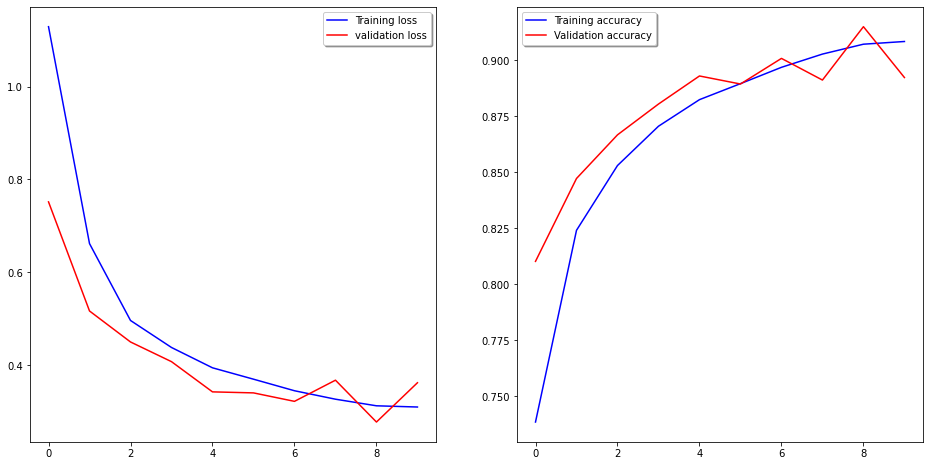

In [158]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [159]:
from sklearn.metrics import classification_report, confusion_matrix

score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.36253130435943604
Test accuracy: 0.8923700451850891


In [160]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.35804659128189087
Test accuracy: 0.893236517906189


In [161]:
# Classification
y_pred = model.predict(x_test)

y_pred

2519/2519 [==============================] - 9s 3ms/step


array([[7.1485442e-06, 1.3305074e-05, 7.6271361e-05, ..., 2.0768315e-05,
        2.1799875e-04, 4.4442108e-04],
       [3.6773604e-04, 6.6873086e-05, 3.2076051e-03, ..., 2.2062173e-04,
        3.5243723e-04, 3.9498308e-03],
       [6.8324616e-06, 1.3705179e-05, 7.4455769e-05, ..., 2.0651736e-05,
        2.1807266e-04, 4.2593398e-04],
       ...,
       [1.0314491e-05, 2.4780337e-04, 1.1681705e-03, ..., 9.1795791e-03,
        4.5148842e-04, 8.3767222e-03],
       [5.2959211e-05, 7.5064486e-01, 1.7665425e-01, ..., 3.5272017e-03,
        9.5843809e-04, 1.9477665e-02],
       [1.0425835e-05, 1.4489560e-05, 9.8148725e-05, ..., 2.4737505e-05,
        2.0455501e-04, 5.1855051e-04]], dtype=float32)

In [162]:

for i in range(0,len(y_pred)):
# Get the index of the maximum value in the output list
  max_index = np.argmax(y_pred[i])
  # Create a binary vector with the maximum value as 1 and other values as 0
  y_pred[i] = np.zeros(len(y_pred[i]))

  y_pred[i][max_index] = 1

In [163]:
labels = ['Bathroom|Cleaning',
 'Bathroom|Showering',
 'Bathroom|Using_the_sink',
 'Bathroom|Using_the_toilet',
 'Bedroom|Cleaning',
 'Bedroom|Dressing',
 'Bedroom|Napping',
 'Bedroom|Reading',
 'Entrance|Entering',
 'Entrance|Leaving',
 'Kitchen|Cleaning',
 'Kitchen|Cooking',
 'Kitchen|Preparing',
 'Kitchen|Washing_the_dishes',
 'Living_room|Cleaning',
 'Living_room|Computing',
 'Living_room|Eating',
 'Living_room|Watching_TV',
 'Office|Cleaning',
 'Office|Computing',
 'Office|Watching_TV',
 'Staircase|Going_down',
 'Staircase|Going_up',
 'Toilet|Using_the_toilet',
 'Transition']

In [164]:
df_pred = pd.DataFrame( y_pred,columns=labels)

In [165]:
df_pred

,Bathroom|Cleaning,Bathroom|Showering,Bathroom|Using_the_sink,Bathroom|Using_the_toilet,Bedroom|Cleaning,Bedroom|Dressing,Bedroom|Napping,Bedroom|Reading,Entrance|Entering,Entrance|Leaving,...,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet,Transition
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80576,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80578,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
original_array_pred = df_pred.idxmax(axis=1)

In [167]:
original_array_pred


0               Office|Computing
1               Office|Computing
2               Office|Computing
3               Office|Computing
4               Office|Computing
                  ...           
80575           Office|Computing
80576            Bedroom|Napping
80577    Living_room|Watching_TV
80578         Bathroom|Showering
80579           Office|Computing
Length: 80580, dtype: object

In [168]:
df_test = pd.DataFrame( y_test,columns=labels)
original_array_test = df_test.idxmax(axis=1)
original_array_test

0               Office|Computing
1               Office|Computing
2               Office|Computing
3               Office|Computing
4               Office|Computing
                  ...           
80575           Office|Computing
80576            Bedroom|Napping
80577    Living_room|Watching_TV
80578         Bathroom|Showering
80579           Office|Computing
Length: 80580, dtype: object

In [169]:
cm = confusion_matrix(original_array_test,original_array_pred)

In [170]:
df_cm = pd.DataFrame( cm,columns=labels, index=labels)

In [171]:
df_cm

,Bathroom|Cleaning,Bathroom|Showering,Bathroom|Using_the_sink,Bathroom|Using_the_toilet,Bedroom|Cleaning,Bedroom|Dressing,Bedroom|Napping,Bedroom|Reading,Entrance|Entering,Entrance|Leaving,...,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet,Transition
Bathroom|Cleaning,0,0,41,39,0,5,2,0,0,6,...,0,0,0,0,6,0,0,0,0,6
Bathroom|Showering,0,2624,18,0,0,0,0,0,9,0,...,0,0,89,0,0,0,0,0,0,0
Bathroom|Using_the_sink,0,410,162,27,0,0,153,0,0,0,...,55,2,21,0,54,0,0,0,0,55
Bathroom|Using_the_toilet,0,0,5,69,0,0,39,0,0,0,...,0,0,0,0,156,0,0,0,0,1
Bedroom|Cleaning,0,1,14,9,0,25,0,0,0,1,...,0,0,0,0,2,0,0,0,0,1
Bedroom|Dressing,0,0,7,0,0,141,17,82,7,3,...,3,4,4,0,1,0,0,0,0,4
Bedroom|Napping,0,2,5,8,0,2,2949,6,0,0,...,11,1,1,0,3,0,0,0,0,1
Bedroom|Reading,0,0,0,0,0,383,0,2903,0,0,...,0,0,0,0,0,0,0,0,0,0
Entrance|Entering,0,82,3,0,0,0,0,0,168,31,...,0,5,15,0,0,0,0,0,0,7
Entrance|Leaving,0,86,2,0,0,0,0,0,70,27,...,1,0,0,0,5,0,0,0,0,1


In [172]:
df_cm.to_csv("confusion_matrix_GRU_ANOVA_50.csv",index=True)

In [173]:
# y_true and y_pred are your true and predicted labels, respectively
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)

# Calculate the weighted average of precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
weights = np.sum(y_test, axis=0)
precision_weighted = np.sum(precision * weights) / np.sum(weights)
recall_weighted = np.sum(recall * weights) / np.sum(weights)
f1_score_weighted = np.sum(f1_score * weights) / np.sum(weights)

print("Precision:", precision_weighted)
print("Recall:", recall_weighted)
print("F1 score:", f1_score_weighted)

Precision: 0.8852167467489032
Recall: 0.8932365351203773
F1 score: 0.8834028997040638


In [175]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8932365351203773
